# STAT 504 Fall 2015
Homework #2<br>
Amanda Culley


This assignment uses a small subset of the data from Kaggle's Yelp Business Rating Prediction competition. The data set is at https://github.com/justmarkham/DAT7/tree/master/data/yelp.csv
Description of the data: Each observation in this dataset is a review of a particular business by a particular user. The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) The "cool" column is the number of "cool" votes this particular review received from other Yelp users. There is no limit to how many "cool" votes a review can receive. The "useful" and "funny" columns are similar to the "cool" column.

### 1. Read yelp.csv into a DataFrame.

In [1]:
import pandas as pd
yelp=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv')

### 2. Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [2]:
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

### 3. Use a random seed 1234567, split the new DataFrame into training and testing sets, using the review text as the feature and the star rating as the response variable.

(For convenience, I split the entire data set into training and testing sets, with the star rating as the response variable.)

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(yelp_best_worst, yelp_best_worst.stars, random_state=1234567)

## 4. Use CountVectorizer to create document-term matrices from X_train and X_test.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train.text)
test_dtm = vect.transform(X_test.text)

## 5. Use Logistic Regression, k-Nearest Neighbors, Classification Tree to predict the star rating for reviews in the testing set, and calculate the AUC and plot the ROC Curve for the three models.
a. Hint 1: Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.
b. Hint 2: roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.

### Step 1.    <br>roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.

In [5]:
import numpy as np
y_test_binary = np.where(y_test==5, 1, 0)

### Step 2. <br> Fit models with training data and predict class (1 or 5 stars) and probabilities for testing data.

#### Logistic Regression:

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
y_pred_prob_log = logreg.predict_proba(test_dtm)[:, 1]

#### k-Nearest Neighbors:

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_dtm, y_train)
y_pred_class = knn.predict(test_dtm)
y_pred_prob_knn = knn.predict_proba(test_dtm)[:, 1]

#### Classification Tree:

In [8]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(train_dtm, y_train)
y_pred_class = treeclf.predict(test_dtm)
y_pred_prob_tree = treeclf.predict_proba(test_dtm)[:, 1]

### Step 3.<br> Calculate the AUC for the three models.

In [9]:
from sklearn import metrics
print 'Logistic Regression AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_log))
print 'K nearest neighbors AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_knn))
print 'Decision Tree AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_tree))

Logistic Regression AUC: 0.956691221009
K nearest neighbors AUC: 0.735536059712
Decision Tree AUC: 0.744820466728


### Step 4.<br> Plot the ROC curves for the three models.

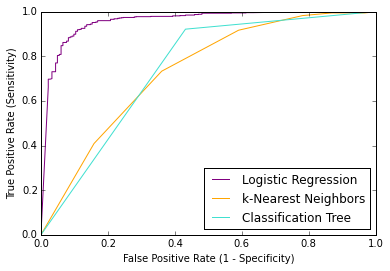

In [22]:
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
fpr_log, tpr_log, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_log)
plt.plot(fpr_log, tpr_log, color='purple')
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, color='orange')
fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, color='turquoise')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
log_line = mlines.Line2D([], [], color='purple', label='Logistic Regression')
knn_line = mlines.Line2D([], [], color='orange', label='k-Nearest Neighbors')
tree_line = mlines.Line2D([], [], color='turquoise', label='Classification Tree')
plt.legend(handles=[log_line, knn_line, tree_line], loc=4)

## 6. Add vote types (cool/useful/funny) as an additional features into the modeling process and refit the three models to predict the star rating in the testing set, and calculate the AUC and plot the ROC Curve for the three models. Any improvement or not? Comment on your findings.

### Step 1.<br> Pull out feature columns for X_train and X_test.

In [23]:
feature_cols=['cool','useful','funny']
train_dtm=X_train[feature_cols]
test_dtm=X_test[feature_cols]

### Step 2. <br> Fit models with training data and predict class (1 or 5 stars) and probabilities for testing data.

#### Logistic Regression:

In [24]:
logreg = LogisticRegression(C=1e9)
logreg.fit(train_dtm, y_train)
y_pred_class = logreg.predict(test_dtm)
y_pred_prob_log = logreg.predict_proba(test_dtm)[:, 1]

#### k-Nearest Neighbors:

In [25]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(train_dtm, y_train)
y_pred_class = knn.predict(test_dtm)
y_pred_prob_knn = knn.predict_proba(test_dtm)[:, 1]

#### Classification Tree:

In [26]:
treeclf = DecisionTreeClassifier()
treeclf.fit(train_dtm, y_train)
y_pred_class = treeclf.predict(test_dtm)
y_pred_prob_tree = treeclf.predict_proba(test_dtm)[:, 1]

### Step 3.<br> Calculate the AUC for the three models.

In [27]:
print 'Logistic Regression AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_log))
print 'K nearest neighbors AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_knn))
print 'Decision Tree AUC: ' + str(metrics.roc_auc_score(y_test_binary, y_pred_prob_tree))

Logistic Regression AUC: 0.674433524167
K nearest neighbors AUC: 0.651455349525
Decision Tree AUC: 0.620387919524


### Step 4.<br> Plot the ROC curves for the three models.

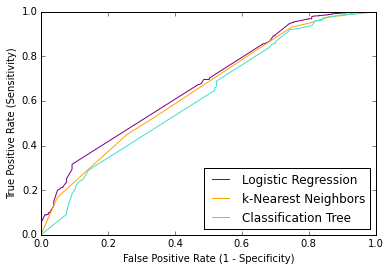

In [29]:
fpr_log, tpr_log, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_log)
plt.plot(fpr_log, tpr_log, color='purple')
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, color='orange')
fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob_tree)
plt.plot(fpr_tree, tpr_tree, color='turquoise')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
log_line = mlines.Line2D([], [], color='purple', label='Logistic Regression')
knn_line = mlines.Line2D([], [], color='orange', label='k-Nearest Neighbors')
tree_line = mlines.Line2D([], [], color='turquoise', label='Classification Tree')
plt.legend(handles=[log_line, knn_line, tree_line], loc=4)

##  Any improvement or not? Comment on your findings.
Using the count vectorization of the review text is clearly much more useful than how many people voted the review 'cool', 'useful', 'funny' for predicting whether the rating was one or five stars, which is not too surprising.  

Amongst the three models, logistic regression is the best in both cases, with an AUC of .9567 with the review text as a feature variable, and .6744 with the 'cool', 'useful', 'funny' feature variables.  

If we had been able to add the 'cool', 'useful', 'funny' variables as features to the count vectorization of the review text, it would have been really interesting to see whether and how much that improved the accuracy of the predictions.  Since the AUC values for the 'cool', 'useful', 'funny' feature variables were greater than .5, I would guess that adding them as features to the count vectorization of the test model would have improved the predictions.